In [1]:
import pandas as pd


/Users/emily-air13/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/emily-air13/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/Users/emily-air13/anaconda3/lib/python3.6/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will 

In [6]:
loans = pd.read_csv('../loanstats.csv')

In [4]:
loans.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,set,timestamp
0,NaN,NaN,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,accepted,2017-11-08 13:54:05.580572
1,NaN,NaN,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,accepted,2017-11-08 13:54:05.580572
2,NaN,NaN,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,accepted,2017-11-08 13:54:05.580572
3,NaN,NaN,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,accepted,2017-11-08 13:54:05.580572
4,NaN,NaN,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,accepted,2017-11-08 13:54:05.580572


In [8]:
loans[loans['dti']==-1].count()

id                            2
loan_amnt                     2
term                          2
int_rate                      2
installment                   2
grade                         2
sub_grade                     2
emp_title                     2
emp_length                    2
home_ownership                2
annual_inc                    2
issue_d                       2
purpose                       2
title                         2
zip_code                      2
addr_state                    2
dti                           2
delinq_2yrs                   2
fico_range_low                2
fico_range_high               2
mths_since_last_delinq        2
open_acc                      2
revol_bal                     2
revol_util                    2
total_acc                     2
next_pymnt_d                  1
last_credit_pull_d            2
last_fico_range_high          2
last_fico_range_low           2
collections_12_mths_ex_med    2
policy_code                   2
applicat

In [5]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

missing_percents = (len(loans.index) - loans.count())/len(loans.index)
#missing_percents.sort_values(inplace=True)
#missing_percents.plot.barh(figsize=(20,40))
#plt.yticks(size=20)
#plt.show()



In [6]:
drops = missing_percents[missing_percents > .7]

In [6]:
drops

id                                            0.999986
member_id                                     1.000000
url                                           1.000000
desc                                          0.923447
mths_since_last_record                        0.831040
mths_since_last_major_derog                   0.734741
annual_inc_joint                              0.979042
dti_joint                                     0.979044
verification_status_joint                     0.979042
mths_since_recent_bc_dlq                      0.758860
revol_bal_joint                               0.986747
sec_app_earliest_cr_line                      0.986747
sec_app_inq_last_6mths                        0.986747
sec_app_mort_acc                              0.986747
sec_app_open_acc                              0.986747
sec_app_revol_util                            0.986922
sec_app_open_act_il                           0.986747
sec_app_num_rev_accts                         0.986747
sec_app_ch

In [7]:
columns = drops.index

In [8]:
for c in columns:
    loans.drop(c, axis=1, inplace=True)

In [ ]:
loans.dtypes

In [ ]:
loans.count()

In [9]:
pd.set_option('display.max_columns', 110)

In [10]:
drops2=['funded_amnt','funded_amnt_inv','verification_status','loan_status','pymnt_plan','initial_list_status','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_int','total_rec_late_fee','total_rec_prncp','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','next_pymnt_d','hardship_flag','disbursement_method','debt_settlement_flag']

In [11]:
for d in drops2:
    loans.drop(d, axis=1, inplace=True)

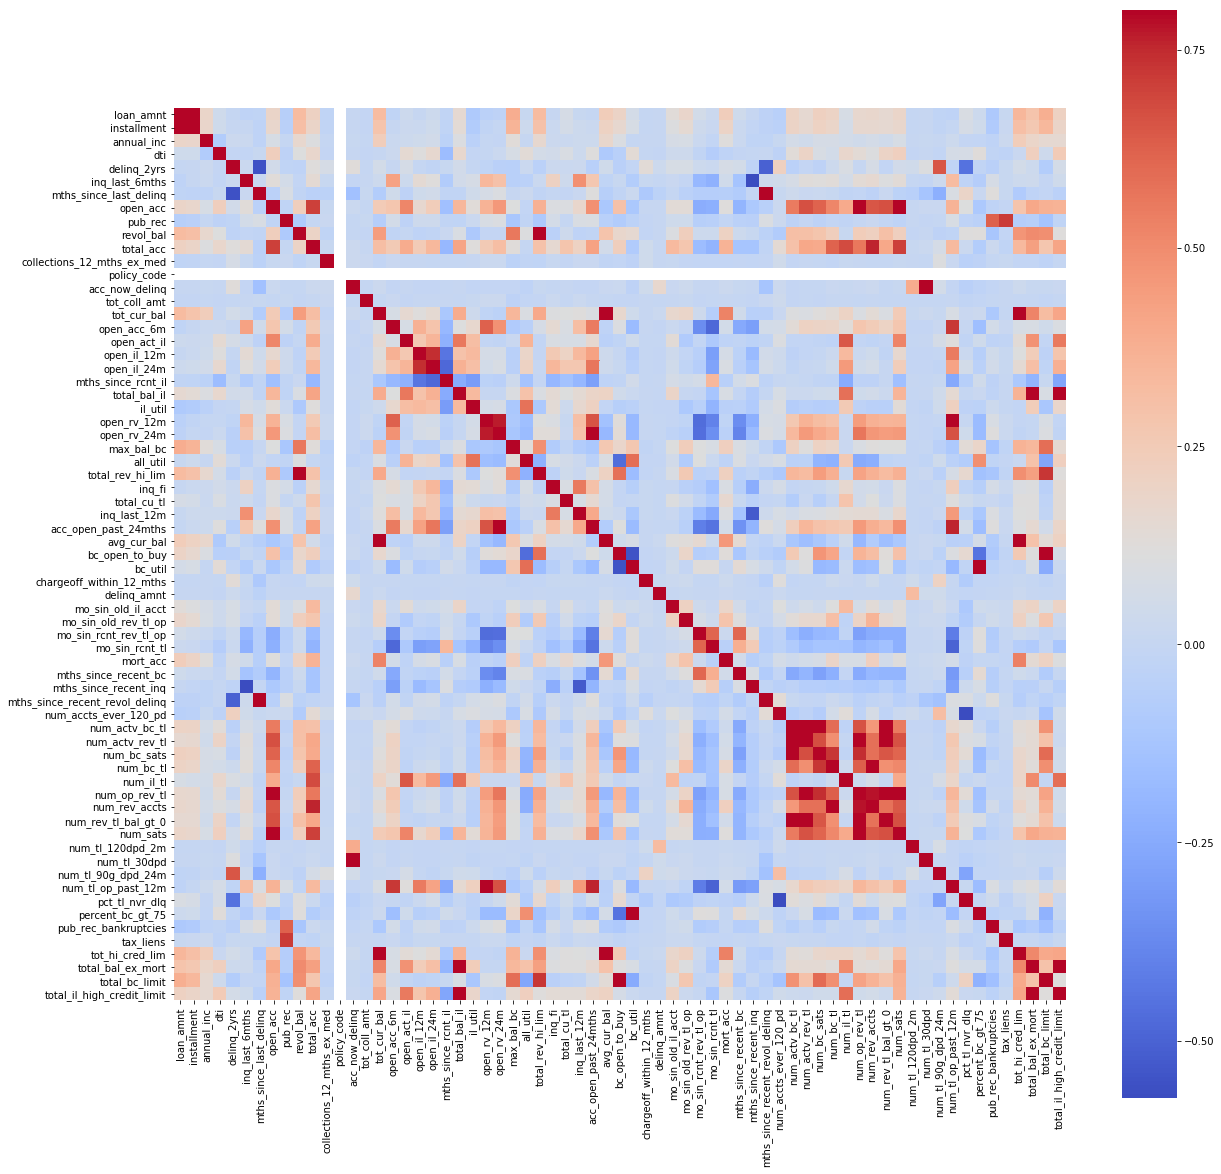

In [12]:
types = loans.dtypes
types = types[types!=object]
numerical = loans[types.index]


import seaborn as sns


plt.close('all')
plt.figure(figsize=(20,20))
sns.heatmap(numerical.corr(), vmax=.8, square=True, cmap=cm.coolwarm)
plt.show()

In [20]:
loans['mths_since_recent_inq'].value_counts()

1.0     160804
0.0     128268
2.0     127935
3.0     115810
4.0     104447
5.0      92621
6.0      82890
7.0      79131
8.0      70028
9.0      61620
10.0     54273
11.0     48359
12.0     43650
13.0     38433
14.0     33779
15.0     29590
16.0     26092
17.0     23331
18.0     20830
19.0     18993
20.0     17016
21.0     15577
22.0     14183
23.0     13201
24.0      6563
25.0        24
Name: mths_since_recent_inq, dtype: int64

# Scratch work

In [ ]:
loans.describe()

In [10]:
t = loans.isnull().any()
t[t==False]

set          False
timestamp    False
dtype: bool

In [11]:
loans_temp = loans.drop(['set', 'timestamp'], axis=1)

In [12]:
t2 = loans_temp.isnull().all(1)
b = t2[t2==True].index


In [13]:
loans.drop(loans.index[b], inplace=True)

In [2]:
import pandas as pd
declined = pd.read_csv('../declinestats.csv')

In [5]:
declined['dti'].count()

16131179

In [4]:
declined['dti'].describe()

-1.00        1106160
 0.00         637482
 100.00       222434
 9999.00       61760
 1.20          19569
 1.50          16803
 1.00          16782
 2.00          15094
 3.00          14161
 2.40          12736
 0.60          11845
 0.75          11378
 2.50          10895
 6.00          10512
 0.86          10461
 1.25           9713
 3.60           9018
 12.00          8517
 4.80           8263
 0.67           8177
 0.50           8145
 7.20           7525
 9.60           7366
 4.00           7230
 14.40          7222
 8.40           7214
 1.67           7180
 18.00          7139
 16.80          7093
 1.80           7081
              ...   
 1017.86           1
 29459.50          1
 1610.23           1
 29462.50          1
 350.77            1
 1017.11           1
 3017.39           1
 4820.48           1
 1299.25           1
 29434.75          1
 349.77            1
 1659.77           1
 2478.38           1
 1309.00           1
 3006.86           1
 348.77            1
 413.59      

In [ ]:
declined.head()

In [ ]:
missing_percentsd = (len(declined.index) - declined.count())/len(declined.index)
missing_percentsd.sort_values(inplace=True)
missing_percentsd

In [ ]:
declined['Risk_Score'].describe()

In [ ]:
l = list(loans)
d = list(declined)
l
#res = list(set(l)^set(d))
#res

In [ ]:
d



'Amount Requested',
 'Application Date',
 'Loan Title',
 'Risk_Score',
 'Debt-To-Income Ratio',
 'Zip Code',
 'State',
 'Employment Length',
 'Policy Code',
 'set',
 'timestamp'


In [ ]:
t = loans['funded_amnt'] - loans['loan_amnt']

In [ ]:
t.describe()

In [ ]:
t = loans[loans['funded_amnt'] != loans['loan_amnt']]

In [ ]:
t.count()

In [ ]:
t['loan_amnt'].describe()

In [ ]:
t['funded_amnt'].describe()

In [ ]:
types = loans.dtypes
types = types[types!=object]
types

In [ ]:
numerical = loans[types.index]


import seaborn as sns


plt.close('all')
plt.figure(figsize=(20,20))
sns.heatmap(numerical.corr(), vmax=.8, square=True, cmap=cm.coolwarm)
plt.show()

In [ ]:
loans['grade'].value_counts()

In [ ]:
declined['Risk_Score'].max()

In [ ]:
t = declined[declined['Risk_Score'] > 850]
t

In [ ]:
declined.count()

In [ ]:
declined['Risk_Score'].mean()

In [ ]:
import datetime
format = '%Y-%m-%d'
declined['Application Date'] = declined['Application Date'].map(lambda a: datetime.datetime.strptime(a, format))


In [ ]:
m1=(declined['Application Date'] >='2013-11-06')
#m2=(declined['Application Date'] <'2013-11-06')

declined.loc[m1,'Risk_Score']=declined.loc[m1,'Risk_Score'] * (85/99)
#declined.loc[m2,'Risk_Score']=declined.loc[m2,'Risk_Score']

In [ ]:
declined['Risk_Score'].count()

In [ ]:
declined['Risk_Score'].fillna(declined['Risk_Score'].mean(), inplace=True)

Option 1: Drop Rows without a Credit Score
Option 2: Fill NaNs

In [ ]:
#declined['Debt-To-Income Ratio'].fillna(declined['Debt-To-Income Ratio'].mean(), inplace=True)
declined['Debt-To-Income Ratio'].mean()

### FICO for Loan Stats

In [15]:
len = loans['set'].count()
len

1646778

In [21]:
SIGMA=100.0 # stddev for FICO obtained from here: http://www.fico.com/en/blogs/risk-compliance/us-credit-quality-continues-climb-will-level/ in the comments section
import scipy.stats as stats

a, b = 600, 850
mu, sigma = 699, 100
dist = stats.truncnorm((a - mu) / sigma, (b - mu) / sigma, loc=mu, scale=sigma)

values = dist.rvs(1646778)
values.mean()


714.0741361646991

In [70]:
scores = []
for index, row in loans.iterrows():
    if (row['open_acc']>0 and row['num_sats'] < row['open_acc']):
        credit_score = row['num_sats']/row['open_acc']*100
    else:
        credit_score = 100
    credit_score = credit_score + 50 - row['tax_liens']*10
    credit_score = credit_score + 100 - row['pub_rec_bankruptcies']*50
    credit_score = credit_score + 47.5 - row['num_tl_30dpd']*10
    if row['all_util'] > 0:
        credit_score = credit_score + 150 *(1 - row['all_util']/100) + 1
    else:
        credit_score += 50
    if (row['num_actv_rev_tl']>0):
        credit_score = credit_score + 50*row['num_rev_tl_bal_gt_0']/row['num_actv_rev_tl']
    else: 
        credit_score += 50
    credit_score = credit_score + 55*(1-row['percent_bc_gt_75']/100)
    if (row['mo_sin_old_il_acct'] > 48):
        credit_score = credit_score + 77.5
    else:
        credit_score = credit_score + 77.5*(row['mo_sin_old_il_acct']/48)
    if (row['mo_sin_rcnt_tl'] > 48):
        credit_score = credit_score + 50
    else:
        credit_score = credit_score + 50*(row['mo_sin_rcnt_tl']/48)
    if (row['inq_last_12m'] < 5):
        credit_score = credit_score + 50 - 10*row['inq_last_12m']
    if (row['num_tl_op_past_12m'] < 4):
        credit_score = credit_score + 35 - 10*row['num_tl_op_past_12m']
    if (row['total_acc'] > 4):
        credit_score = credit_score + 40
    else:
        credit_score = credit_score + 10* row['total_acc']
    if (row['num_actv_rev_tl']>0 and (row['num_il_tl'] < row['num_actv_rev_tl']):
        credit_score = credit_score + 45*(row['num_il_tl']/row['num_actv_rev_tl'])
    else if (row['num_il_tl']>0):
        credit_score = credit_score + 45*(row['num_actv_rev_tl']/row['num_il_tl'])
    else: 
        credit_score += 45
    #if (credit_score > 850):
    #    credit_score = 850
    #if (credit_score < 350):
    #    credit_score = 350
    scores.append(credit_score)
    
                

In [105]:
row = loans.loc[1646531,:]
#row['num_sats']
#row['total_acc']
row['num_actv_rev_tl']/row['num_il_tl']

0.083333333333333329

In [29]:
loans['num_sats'].fillna(loans['num_sats'].mean(), inplace=True)
loans['open_acc'].fillna(loans['open_acc'].mean(), inplace=True)
loans['tax_liens'].fillna(loans['tax_liens'].mean(), inplace=True)
loans['pub_rec_bankruptcies'].fillna(loans['pub_rec_bankruptcies'].mean(), inplace=True)
loans['num_tl_30dpd'].fillna(loans['num_tl_30dpd'].mean(), inplace=True)
loans['all_util'].fillna(loans['all_util'].mean(), inplace=True)
loans['num_rev_tl_bal_gt_0'].fillna(loans['num_rev_tl_bal_gt_0'].mean(), inplace=True)
loans['num_actv_rev_tl'].fillna(loans['num_actv_rev_tl'].mean(), inplace=True)
loans['percent_bc_gt_75'].fillna(loans['percent_bc_gt_75'].mean(), inplace=True)
loans['mo_sin_old_il_acct'].fillna(loans['mo_sin_old_il_acct'].mean(), inplace=True)
loans['mo_sin_rcnt_tl'].fillna(loans['mo_sin_rcnt_tl'].mean(), inplace=True)
loans['inq_last_12m'].fillna(loans['inq_last_12m'].mean(), inplace=True)
loans['num_tl_op_past_12m'].fillna(loans['num_tl_op_past_12m'].mean(), inplace=True)
loans['total_acc'].fillna(loans['total_acc'].mean(), inplace=True)
loans['num_il_tl'].fillna(loans['num_il_tl'].mean(), inplace=True)
loans['num_actv_rev_tl'].fillna(loans['num_actv_rev_tl'].mean(), inplace=True)

In [80]:
scores[100000]

604.4768094064189

In [71]:
#import numpy as np
m = pd.Series(scores)

In [85]:
m[m<600].count()/m.count()

6.6796170271939359e-05

In [89]:
loans.loc[1646531]

loan_amnt                                               1200
term                                               36 months
int_rate                                              18.06%
installment                                            43.42
grade                                                      D
sub_grade                                                 D2
emp_title                                      Merchandiser 
emp_length                                           2 years
home_ownership                                          RENT
annual_inc                                             22000
issue_d                                             Jul-2017
purpose                                       major_purchase
title                                         Major purchase
zip_code                                               392xx
addr_state                                                MS
dti                                                    18.82
delinq_2yrs             

In [84]:
m[m>850].count()/m.count()

0.076089339270500808

In [ ]:
loans['risk_score_calc'] = m.values

# Reimport

In [122]:
import datetime 

files=['tempdata/LoanStats3a_securev1.csv','tempdata/LoanStats3b_securev1.csv','tempdata/LoanStats3c_securev1.csv',
      'tempdata/LoanStats3d_securev1.csv','tempdata/LoanStats_securev1_2016Q1.csv','tempdata/LoanStats_securev1_2016Q2.csv',
      'tempdata/LoanStats_securev1_2016Q3.csv','tempdata/LoanStats_securev1_2016Q4.csv',
       'tempdata/LoanStats_securev1_2017Q1.csv','tempdata/LoanStats_securev1_2017Q2.csv','tempdata/LoanStats_securev1_2017Q3.csv']

dataframe_collection = []


for file in files:
    df = pd.read_csv(file,header=1,low_memory=False)
    dataframe_collection.append(df)

loans = pd.DataFrame(columns=dataframe_collection[0].columns.values.tolist())

for df in dataframe_collection:
  loans = loans.append(df)

loans['set']='accepted'
loans['timestamp']=datetime.datetime.now()


In [123]:
missing_percents = (len(loans.index) - loans.count())/len(loans.index)
drops = missing_percents[missing_percents > .7]
drops

member_id                                     1.000000
desc                                          0.923447
mths_since_last_record                        0.831040
mths_since_last_major_derog                   0.734741
annual_inc_joint                              0.979042
dti_joint                                     0.979044
verification_status_joint                     0.979042
mths_since_recent_bc_dlq                      0.758860
revol_bal_joint                               0.986747
sec_app_fico_range_low                        0.986747
sec_app_fico_range_high                       0.986747
sec_app_earliest_cr_line                      0.986747
sec_app_inq_last_6mths                        0.986747
sec_app_mort_acc                              0.986747
sec_app_open_acc                              0.986747
sec_app_revol_util                            0.986922
sec_app_open_act_il                           0.986747
sec_app_num_rev_accts                         0.986747
sec_app_ch

In [124]:
loans.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,...,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,set,timestamp
0,1077501,NaN,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,735.0,739.0,1.0,NaN,NaN,3.0,0.0,13648.0,83.7%,9.0,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.0,0.00,Jan-2015,171.62,NaN,Oct-2017,739.0,735.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,accepted,2017-11-14 14:43:31.403727
1,1077430,NaN,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,740.0,744.0,5.0,NaN,NaN,3.0,0.0,1687.0,9.4%,4.0,f,0.0,0.0,1014.530000,1014.53,456.46,435.17,0.00,122.9,1.11,Apr-2013,119.66,NaN,Oct-2016,499.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,accepted,2017-11-14 14:43:31.403727
2,1077175,NaN,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,735.0,739.0,2.0,NaN,NaN,2.0,0.0,2956.0,98.5%,10.0,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.0,0.00,Jun-2014,649.91,NaN,Jun-2017,739.0,735.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,accepted,2017-11-14 14:43:31.403727
3,1076863,NaN,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/

In [125]:
columns = drops.index
for c in columns:
    loans.drop(c, axis=1, inplace=True)

In [126]:
#Drop columns about activites after application:
drops2=['url','funded_amnt','funded_amnt_inv','verification_status','loan_status','pymnt_plan','initial_list_status','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_int','total_rec_late_fee','total_rec_prncp','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','next_pymnt_d','hardship_flag','disbursement_method','debt_settlement_flag']
for d in drops2:
    loans.drop(d, axis=1, inplace=True)

In [127]:
#Additional columns to drop:
drops3=[ 'pub_rec','acc_now_delinq','tot_coll_amt','delinq_amnt','mths_since_recent_revol_delinq','num_bc_sats','num_tl_120dpd_2m','pct_tl_nvr_dlq','inq_last_6mths','open_acc_6m','open_il_12m','open_il_24m','open_rv_12m','open_rv_24m','acc_open_past_24mths','mo_sin_old_rev_tl_op','mo_sin_rcnt_rev_tl_op','earliest_cr_line','max_bal_bc','total_rev_hi_lim','avg_cur_bal','bc_open_to_buy','tot_hi_cred_lim','total_bal_ex_mort','total_il_high_credit_limit','num_op_rev_tl']

for d in drops3:
    loans.drop(d, axis=1, inplace=True)


In [128]:
loans.head()

,id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,issue_d,purpose,title,zip_code,addr_state,dti,delinq_2yrs,fico_range_low,fico_range_high,mths_since_last_delinq,open_acc,revol_bal,revol_util,total_acc,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,tot_cur_bal,open_act_il,mths_since_rcnt_il,total_bal_il,il_util,all_util,inq_fi,total_cu_tl,inq_last_12m,bc_util,chargeoff_within_12_mths,mo_sin_old_il_acct,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_tl,num_il_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,total_bc_limit,set,timestamp
0,1077501,5000.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Dec-2011,credit_card,Computer,860xx,AZ,27.65,0.0,735.0,739.0,NaN,3.0,13648.0,83.7%,9.0,Oct-2017,739.0,735.0,0.0,1.0,Individual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,accepted,2017-11-14 14:43:31.403727
1,1077430,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Dec-2011,car,bike,309xx,GA,1.00,0.0,740.0,744.0,NaN,3.0,1687.0,9.4%,4.0,Oct-2016,499.0,0.0,0.0,1.0,Individual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,accepted,2017-11-14 14:43:31.403727
2,1077175,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Dec-2011,small_business,real estate business,606xx,IL,8.72,0.0,735.0,739.0,NaN,2.0,2956.0,98.5%,10.0,Jun-2017,739.0,735.0,0.0,1.0,Individual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,accepted,2017-11-14 14:43:31.403727
3,1076863,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Dec-2011,other,personel,917xx,CA,20.00,0.0,690.0,694.0,35.0,10.0,5598.0,21%,37.0,Apr-2016,604.0,600.0,0.0,1.0,Individual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,accepted,2017-11-14 14:43:31.403727
4,1075358,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Dec-2011,other,Personal,972xx,OR,17.94,0.0,695.0,699.0,38.0,15.0,27783.0,53.9%,38.0,Jan-2017,694.0,690.0,0.0,1.0,Individual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,accepted,2017-11-14 14:43:31.403727


In [129]:
loans['fico_range_low'].value_counts()

660.0    148985
665.0    143663
670.0    143570
675.0    128017
680.0    127462
685.0    111675
690.0    108837
695.0     97485
700.0     90032
705.0     80978
710.0     70768
715.0     62642
720.0     54179
725.0     42879
730.0     37100
735.0     29154
740.0     25827
745.0     20652
750.0     18767
755.0     16103
760.0     13141
765.0     12067
770.0     10000
775.0      9263
780.0      8167
785.0      6517
790.0      6119
795.0      4849
800.0      4440
805.0      3671
810.0      2666
815.0      2132
820.0      1571
825.0      1188
830.0       760
835.0       448
840.0       297
845.0       218
650.0       131
655.0       127
645.0       112
640.0       102
630.0         6
635.0         5
625.0         2
610.0         2
620.0         1
615.0         1
Name: fico_range_low, dtype: int64

In [130]:
loans['fico_range_low'].min()

610.0

In [131]:
 loans.drop('issue_d', axis=1, inplace=True)
 loans.drop('last_fico_range_high', axis=1, inplace=True)
 loans.drop('last_fico_range_low', axis=1, inplace=True)

In [132]:
loans.dtypes

id                                    object
loan_amnt                            float64
term                                  object
int_rate                              object
installment                          float64
grade                                 object
sub_grade                             object
emp_title                             object
emp_length                            object
home_ownership                        object
annual_inc                           float64
purpose                               object
title                                 object
zip_code                              object
addr_state                            object
dti                                  float64
delinq_2yrs                          float64
fico_range_low                       float64
fico_range_high                      float64
mths_since_last_delinq               float64
open_acc                             float64
revol_bal                            float64
revol_util

In [133]:
loans['emp_length'].value_counts()

10+ years    549538
2 years      148367
< 1 year     133332
3 years      130871
1 year       107680
5 years      101848
4 years       98103
n/a           95198
6 years       75568
8 years       72664
7 years       70395
9 years       63214
Name: emp_length, dtype: int64

In [134]:
loans.drop('fico_range_high', axis=1, inplace=True)

In [135]:
output='loanstats.csv'
loans.to_csv(output, index=False)

In [15]:
import pandas as pd
declined = pd.read_csv('declinestats.csv')

In [5]:
declined.head()

,Amount Requested,Application Date,Loan Title,Risk_Score,Debt-To-Income Ratio,Zip Code,State,Employment Length,Policy Code,set,timestamp
0,1000.0,2007-05-26,Wedding Covered but No Honeymoon,693.0,10%,481xx,NM,4 years,0.0,declined,2017-11-08 14:14:48.309059
1,1000.0,2007-05-26,Consolidating Debt,703.0,10%,010xx,MA,< 1 year,0.0,declined,2017-11-08 14:14:48.309059
2,11000.0,2007-05-27,Want to consolidate my debt,715.0,10%,212xx,MD,1 year,0.0,declined,2017-11-08 14:14:48.309059
3,6000.0,2007-05-27,waksman,698.0,38.64%,017xx,MA,< 1 year,0.0,declined,2017-11-08 14:14:48.309059
4,1500.0,2007-05-27,mdrigo,509.0,9.43%,209xx,MD,< 1 year,0.0,declined,2017-11-08 14:14:48.309059


In [6]:
missing_percents_d = (len(declined.index) - declined.count())/len(declined.index)
missing_percents_d

Amount Requested        0.000000
Application Date        0.000000
Loan Title              0.000080
Risk_Score              0.577977
Debt-To-Income Ratio    0.000000
Zip Code                0.000018
State                   0.000001
Employment Length       0.000000
Policy Code             0.000057
set                     0.000000
timestamp               0.000000
dtype: float64

In [7]:
declined['Risk_Score'].max()

990.0

In [8]:
declined['Risk_Score'].min()

0.0

In [16]:
import datetime
import numpy as np

format = '%Y-%m-%d'
declined['Application Date'] = declined['Application Date'].map(lambda a: datetime.datetime.strptime(a, format))

m1=(declined['Application Date'] >='2013-11-06')
declined.loc[m1,'Risk_Score']=declined.loc[m1,'Risk_Score'] * (85/99)


In [12]:
declined['Risk_Score'].value_counts()

430.151515    131970
0.000000       86754
552.070707     55058
532.323232     52913
559.797980     44576
491.969697     43377
558.939394     42393
560.656566     37717
558.080808     36562
569.242424     36522
545.202020     36442
584.696970     36367
557.222222     36241
555.505051     36236
556.363636     36198
554.646465     36089
553.787879     36016
552.929293     35817
562.373737     35646
563.232323     35362
548.636364     35188
566.666667     35172
565.808081     35067
546.919192     35032
561.515152     35010
547.777778     34921
564.090909     34837
550.353535     34818
551.212121     34746
567.525253     34740
               ...  
268.737374         6
277.323232         6
285.050505         5
262.727273         5
384.000000         5
267.020202         5
378.000000         5
368.000000         4
372.000000         4
261.868687         4
379.000000         4
280.757576         4
848.282828         4
260.151515         4
263.585859         4
273.030303         4
267.878788   

In [17]:
m2=(declined['Risk_Score'] <350)
declined.loc[m2,'Risk_Score']=declined['Risk_Score'].mean()

declined['Risk_Score'].fillna(declined['Risk_Score'].mean(), inplace=True)


In [18]:
declined['Risk_Score'].value_counts()

561.934740    9323619
430.151515     131970
554.796402      88628
552.070707      55058
532.323232      52913
559.797980      44576
491.969697      43377
558.939394      42393
560.656566      37717
558.080808      36562
569.242424      36522
545.202020      36442
584.696970      36367
557.222222      36241
555.505051      36236
556.363636      36198
554.646465      36089
553.787879      36016
552.929293      35817
562.373737      35646
563.232323      35362
548.636364      35188
566.666667      35172
565.808081      35067
546.919192      35032
561.515152      35010
547.777778      34921
564.090909      34837
550.353535      34818
551.212121      34746
               ...   
394.000000         11
849.141414         10
840.555556         10
844.000000         10
845.707071         10
382.000000         10
385.000000          9
386.000000          8
387.000000          8
849.000000          8
373.000000          7
383.000000          7
845.000000          7
848.000000          7
380.000000

In [20]:
declined['Policy Code'].value_counts()

0.0    16085443
2.0       45111
Name: Policy Code, dtype: int64

In [21]:
declined['Loan Title'].fillna('None', inplace=True)
declined['Policy Code'].fillna(0, inplace=True)

In [22]:
declined.dropna(subset=['Zip Code'], inplace=True)
declined.dropna(subset=['State'], inplace=True)

In [24]:
declined.drop('Application Date', axis=1, inplace=True)

In [23]:
declined.count()

Amount Requested        16131179
Application Date        16131179
Loan Title              16131179
Risk_Score              16131179
Debt-To-Income Ratio    16131179
Zip Code                16131179
State                   16131179
Employment Length       16131179
Policy Code             16131179
set                     16131179
timestamp               16131179
dtype: int64

In [25]:
declined=declined.rename(columns = {'Amount Requested':'loan_amnt', 
                                    'Loan Title':'title','Risk_Score':'fico_range_low',
                                    'Debt-To-Income Ratio':'dti',
                                   'Zip Code':'zip_code','State':'addr_state','Employment Length':'emp_length',
                                    'Policy Code':'policy_code'})

In [26]:
output='declinestats.csv'
declined.to_csv(output, index=False)

In [9]:
declined = declined[declined['dti']>=0]
declined.count()

loan_amnt         15025019
title             15025019
fico_range_low    15025019
dti               15025019
zip_code          15025019
addr_state        15025019
emp_length        15025019
policy_code       15025019
set               15025019
timestamp         15025019
dtype: int64